# EDA

In [2]:
import sys
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import psycopg2.extras

root_path = Path().resolve().parent.parent
sys.path.append(str(root_path))

from src.dataset.connection import connect_to_spotify_dataset
from src.dataset.connection import select

In [3]:
connection = connect_to_spotify_dataset() # Add db Password
if not connection:
    print("Connection Error")
tds = select(connection, "SELECT * FROM track_data") 

Connection successful
Connection closed.


In [4]:
columns = [
    "id", "name", "popularity", "duration_ms", "explicit", "artists", "id_artists", "release_date",
    "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", 
    "instrumentalness", "liveness", "valence", "tempo", "time_signature","decade", "mood_index", "emotion_index", "party_index", "chill_index"
]
# Create the DataFrame
df = pd.DataFrame(tds, columns=columns)
print(df.dtypes)
df.head()

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit               bool
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                   bool
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
decade                int64
mood_index          float64
emotion_index       float64
party_index         float64
chill_index         float64
dtype: object


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,decade,mood_index,emotion_index,party_index,chill_index
0,1mC0LEmjbCXjs8jjnYIjHw,Yo También Era Dichoso - Instrumental (Remaste...,0,170933,False,[Francisco Canaro],[2maQMqxNnlRrBrS1oAsrX9],1927-09-11,0.808,0.398,...,0.328,0.173,0.6680,114.891,4,1920,0.65600,4.37150,0.6030,0.8024
1,21010f0ucoaLEEn4khQKZb,T for Texas,1,208000,False,[Jimmie Rodgers],[0Y0ZlznP6vzTS1qAm5dvTN],1927,0.571,0.718,...,0.000,0.309,0.5650,78.849,4,1920,0.59740,1.61200,0.6445,0.6774
2,2fPzoKtGjXFDgzIOSAfrEq,Chapter 1 & Chapter 2.1 - Sprawy Sherlocka Hol...,0,128038,False,[Arthur Conan Doyle],[2AcBhTO6Q3zzUrfPKmskp3],1927-07-29,0.703,0.321,...,0.000,0.310,0.8030,87.746,3,1920,0.67660,5.69210,0.5120,0.7738
3,3B6gBlf64fMQY3sbkyFENu,Purple Daze,0,192332,False,[Cellular Project],[6OOyYaxY66YrMwusS1PIr6],1927,0.344,0.857,...,0.874,0.125,0.1580,140.669,4,1920,0.35360,1.95260,0.6005,0.2312
4,3KD6IGlsy0OmvQ5EZVSGwf,Iris: Inno al sole,0,231987,False,"[Pietro Mascagni, Staatskapelle Berlin]","[3Z5fRknMBBNfCw6pkgR9S8, 7vEPPI71V8dEHtEhPMAxWT]",1927-04-01,0.188,0.139,...,0.902,0.817,0.0387,74.178,3,1920,0.10355,5.63778,0.1635,0.9312


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525587 entries, 0 to 525586
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                525587 non-null  object 
 1   name              525587 non-null  object 
 2   popularity        525587 non-null  int64  
 3   duration_ms       525587 non-null  int64  
 4   explicit          525587 non-null  bool   
 5   artists           525587 non-null  object 
 6   id_artists        525587 non-null  object 
 7   release_date      525587 non-null  object 
 8   danceability      525587 non-null  float64
 9   energy            525587 non-null  float64
 10  key               525587 non-null  int64  
 11  loudness          525587 non-null  float64
 12  mode              525587 non-null  bool   
 13  speechiness       525587 non-null  float64
 14  acousticness      525587 non-null  float64
 15  instrumentalness  525587 non-null  float64
 16  liveness          52

In [6]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,decade,mood_index,emotion_index,party_index,chill_index
count,525587.000000,5.255870e+05,525587.000000,525587.000000,525587.000000,525587.000000,525587.000000,525587.000000,525587.000000,525587.000000,525587.000000,525587.000000,525587.000000,525587.000000,525587.000000,525587.000000,525587.000000,525587.000000
mean,27.509999,2.261382e+05,0.564373,0.540393,5.219589,-10.261018,0.108774,0.452466,0.112742,0.214513,0.552803,118.434472,3.870459,1983.840639,0.553792,3.461783,0.552383,0.455322
std,18.311028,9.616929e+04,0.166344,0.251745,3.518654,5.098761,0.186820,0.347718,0.266172,0.184637,0.257812,29.820022,0.480373,22.877152,0.185681,1.447927,0.166625,0.289063
min,0.000000,4.000000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.332800,0.000000,0.000002
25%,13.000000,1.736270e+05,0.454000,0.342000,2.000000,-12.955500,0.034100,0.101000,0.000000,0.098400,0.347000,95.508000,4.000000,1970.000000,0.420300,2.400900,0.439000,0.192540
50%,27.000000,2.139960e+05,0.578000,0.547000,5.000000,-9.295000,0.044500,0.429000,0.000023,0.139000,0.565000,117.264000,4.000000,1990.000000,0.569900,3.189900,0.572000,0.431600
75%,40.000000,2.632000e+05,0.687000,0.746000,8.000000,-6.527000,0.078100,0.785000,0.009140,0.279000,0.770000,136.421500,4.000000,2000.000000,0.702100,4.233200,0.683000,0.711800
max,100.000000,1.200000e+06,0.991000,1.000000,11.000000,5.376000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,2020.000000,0.968400,18.000000,0.974000,0.997576


In [7]:
df.isna().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
decade              0
mood_index          0
emotion_index       0
party_index         0
chill_index         0
dtype: int64

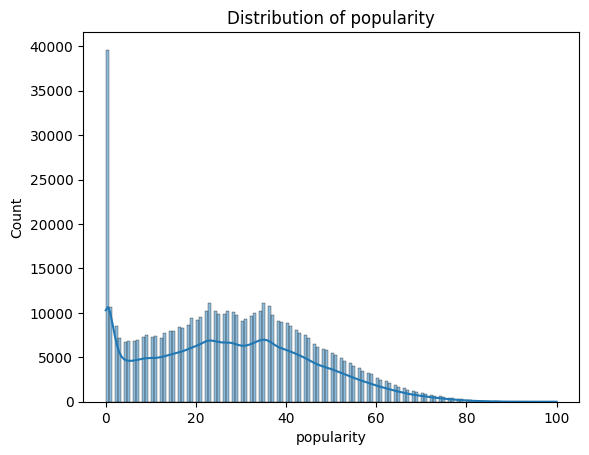

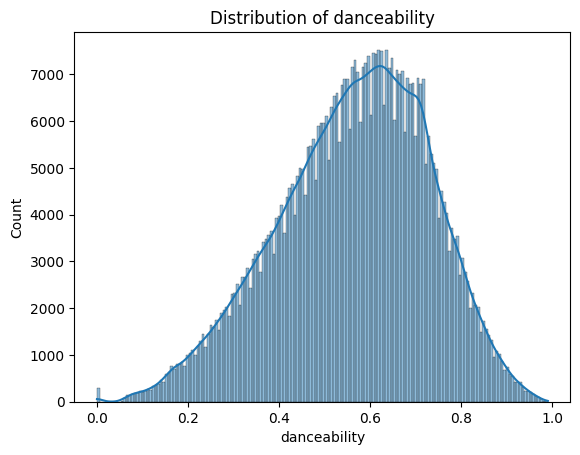

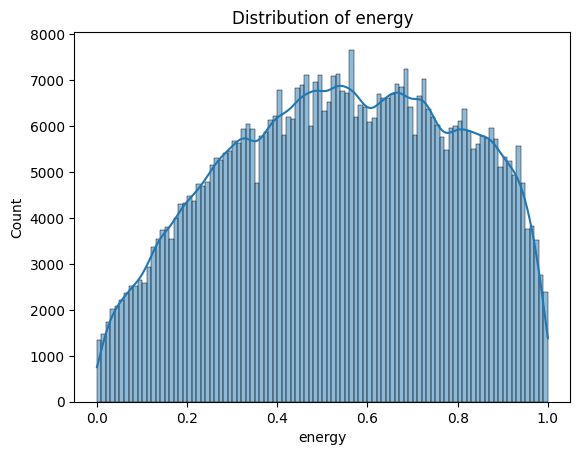

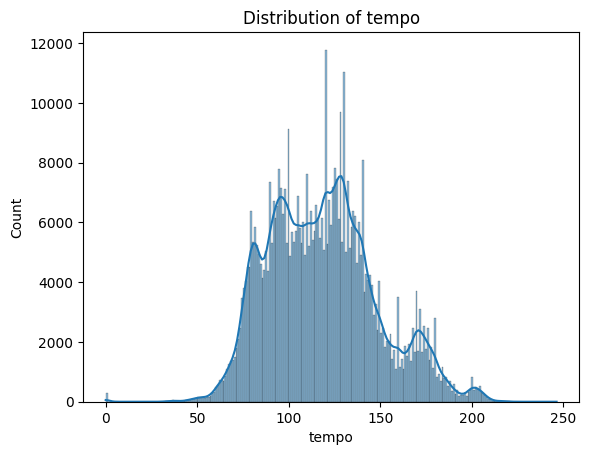

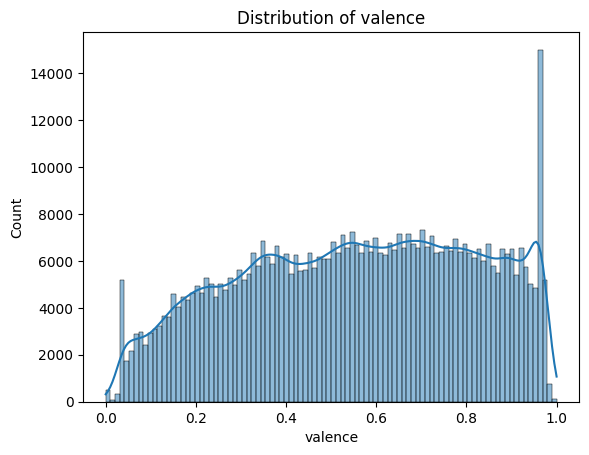

In [8]:
numeric_columns = ['popularity', 'danceability', 'energy', 'tempo', 'valence']
for col in numeric_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [9]:
print(df['artists'].value_counts().head(10))

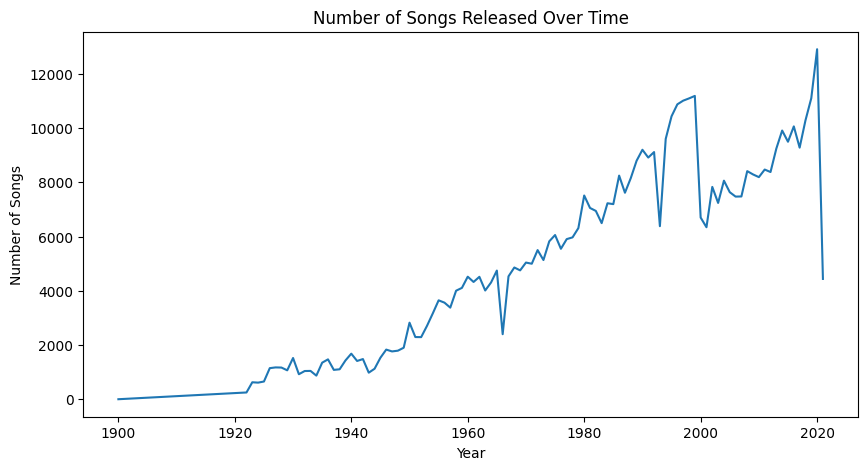

In [10]:
#temporal analysis using release date
def standardize_date(date_str):
    try:
        # Try to parse the full date format (e.g., '1928-01-01')
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except ValueError:
        try:
            # If it only contains year and month (e.g., '1956-03'), add '-01' for the day
            return pd.to_datetime(date_str + '-01', format='%Y-%m-%d')
        except ValueError:
            # If it only contains the year, create a date with January 1st
            return pd.to_datetime(date_str + '-01-01', format='%Y-%m-%d')
            
df['release_date'] = df['release_date'].apply(standardize_date)            
df["release_date"] = pd.to_datetime(df["release_date"])
df["year"] = df["release_date"].dt.year

releases_by_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=releases_by_year.index, y=releases_by_year.values)
plt.title('Number of Songs Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()

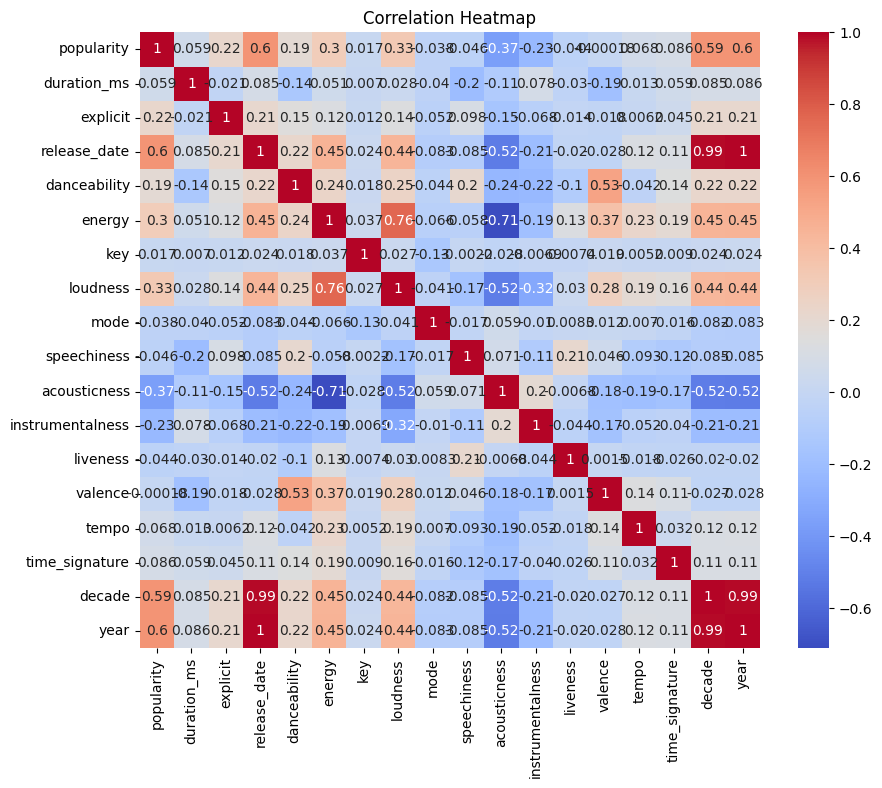

In [11]:
corr_matrix = df.drop(columns = ['id','name','artists','id_artists','mood_index','emotion_index','party_index','chill_index']).corr()
fig, ax = plt.subplots(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

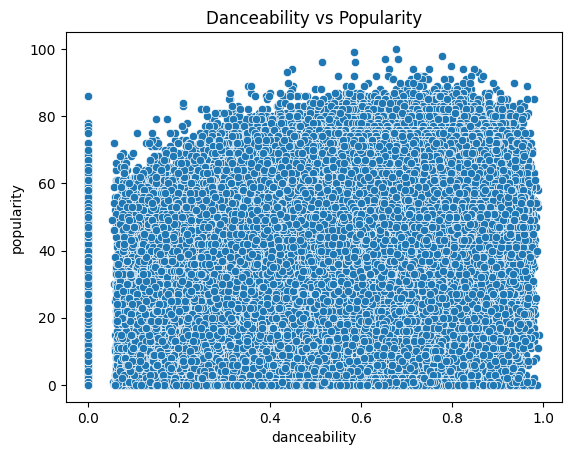

In [12]:
#no correlation with danceability and popularity
sns.scatterplot(x='danceability', y='popularity', data=df)
plt.title('Danceability vs Popularity')
plt.show()

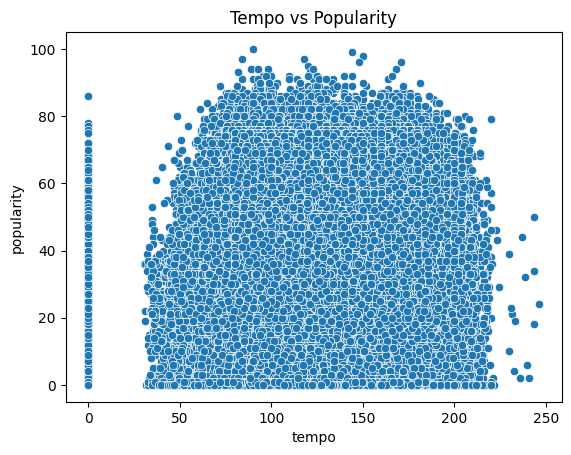

In [13]:
#no correlation with tempo and popularity
sns.scatterplot(x='tempo', y='popularity', data=df)
plt.title('Tempo vs Popularity')
plt.show()

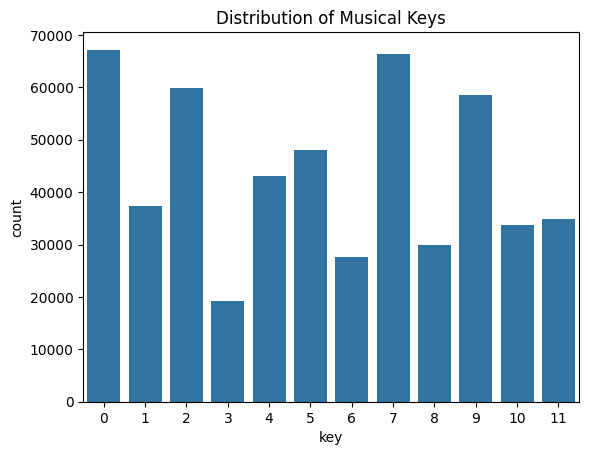

In [14]:
sns.countplot(x='key', data=df)
plt.title('Distribution of Musical Keys')
plt.show()

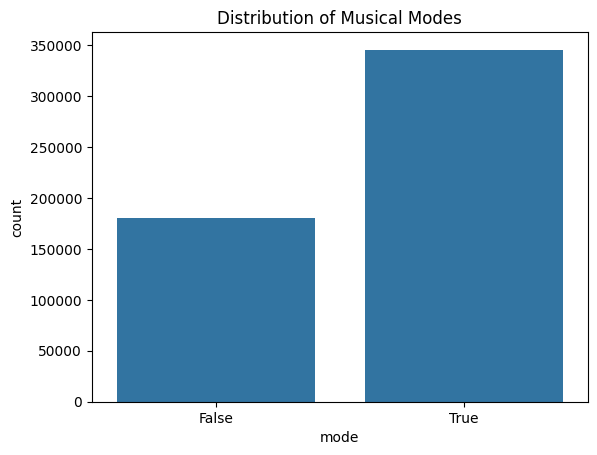

In [15]:
sns.countplot(x='mode', data=df)
plt.title('Distribution of Musical Modes')
plt.show()


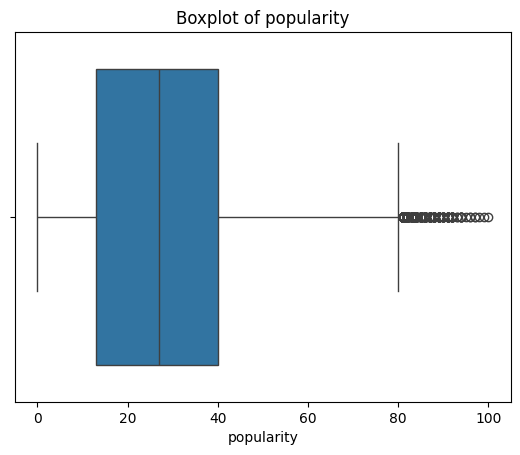

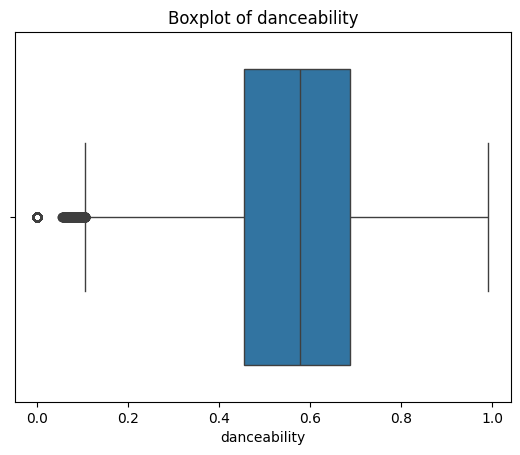

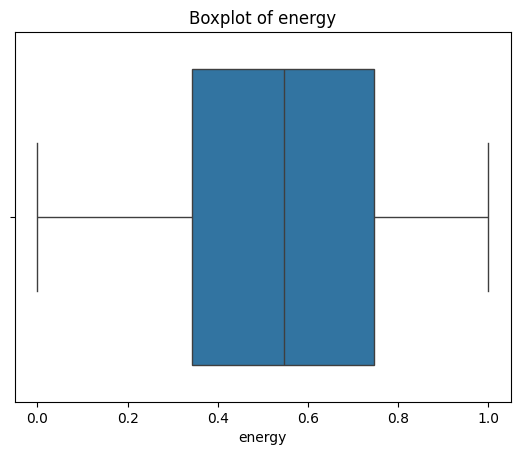

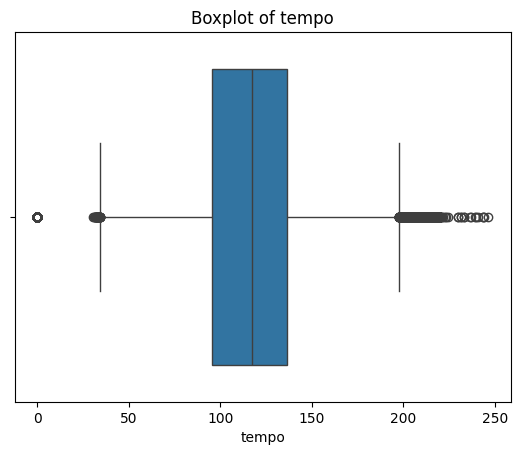

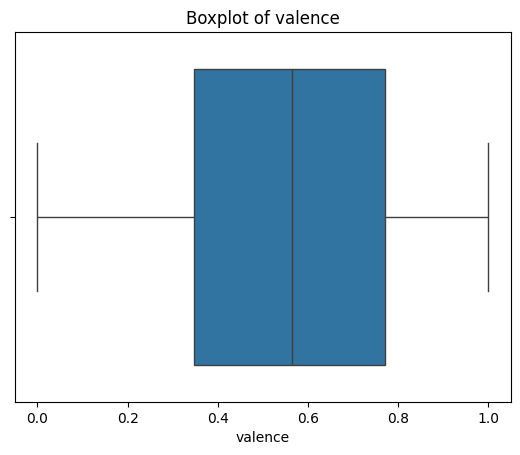

In [16]:
#outliers
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


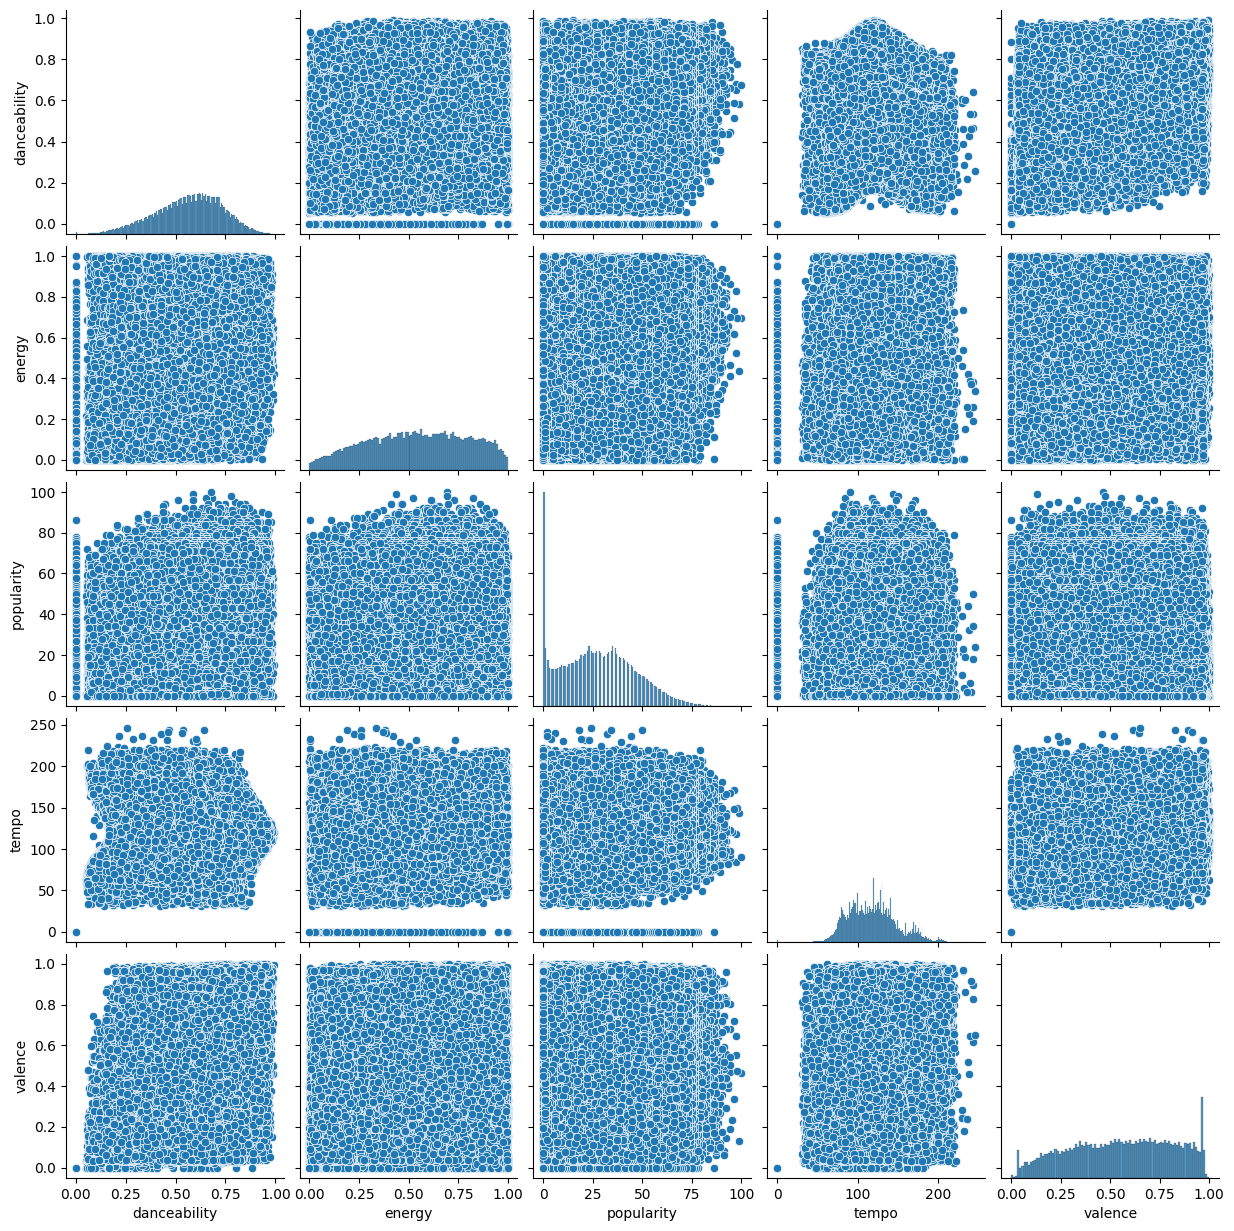

In [17]:
selected_features = ['danceability', 'energy', 'popularity', 'tempo', 'valence']
sns.pairplot(df[selected_features])
plt.show()

Earliest release date in database: 1900-01-01 00:00:00 Latest release date in database: 2021-04-16 00:00:00


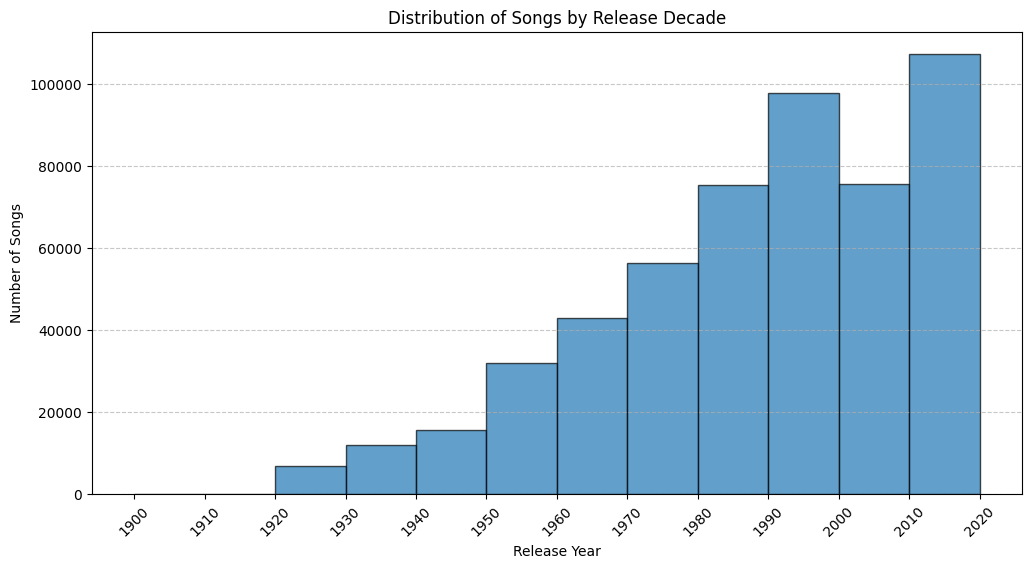

In [18]:
# Define bin edges (5-year intervals from min year to 2020.)
min_year = df["year"].min()
bins = np.arange(min_year, 2030, 10)  # 2025 ensures it includes 2020

print('Earliest release date in database: ' + str(df["release_date"].min()) + ' Latest release date in database: ' + str(df["release_date"].max()))

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(df["year"], bins=bins, edgecolor="black", alpha=0.7)

# Formatting
plt.xlabel("Release Year")
plt.ylabel("Number of Songs")
plt.title("Distribution of Songs by Release Decade")
plt.xticks(bins, rotation=45)  # Rotate for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

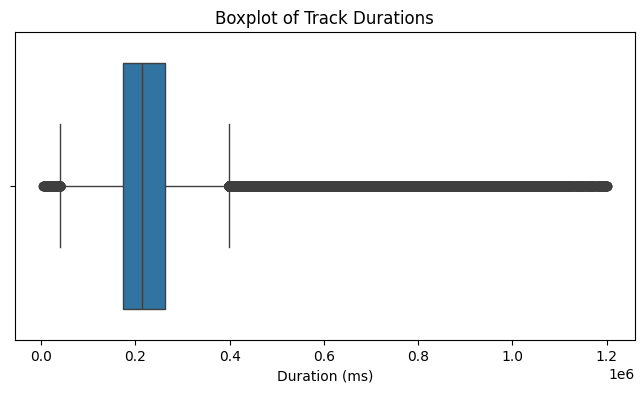

In [19]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration_ms'])

# Show the plot
plt.title("Boxplot of Track Durations")
plt.xlabel("Duration (ms)")
plt.show()

In [20]:
Q1 = df['duration_ms'].quantile(0.25)
Q3 = df['duration_ms'].quantile(0.75)
IQR = Q3 - Q1

# Outlier threshold: 1.5 * IQR rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find potential podcast durations (outliers)
potential_outliers = df[df['duration_ms'] > upper_bound]
potential_outliers

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,liveness,valence,tempo,time_signature,decade,mood_index,emotion_index,party_index,chill_index,year
31,1vBIDHmKhsarRXRiyoUcqZ,"Sonata No. 7 in B-Flat, Op. 83: I. Allegro inq...",0,497027,False,"[Sergei Prokofiev, Vladimir Horowitz]","[4kHtgiRnpmFIV5Tm4BIs8l, 4Ws5hSoABAwvGJ4LhHwHgq]",1928-01-01,0.384,0.2620,...,0.275,0.1230,138.552,4,1920,0.22910,5.44260,0.32300,0.89100,1928
102,66Zm9UHiKKnnyiuxsq48Ur,"Isoldes Liebestod from Tristan und Isolde, S. ...",11,399827,False,"[Franz Liszt, Vladimir Horowitz]","[1385hLNbrnbCJGokfH2ac2, 4Ws5hSoABAwvGJ4LhHwHgq]",1930-01-01,0.305,0.0457,...,0.107,0.0364,67.721,3,1930,0.11884,7.07347,0.17535,0.97452,1930
103,0cWpZ3g8UYSqMjALp83pQo,"Sonata for Piano in B Minor, S. 178: II. Andan...",10,410933,False,"[Franz Liszt, Vladimir Horowitz]","[1385hLNbrnbCJGokfH2ac2, 4Ws5hSoABAwvGJ4LhHwHgq]",1930-01-01,0.323,0.0429,...,0.117,0.0862,120.188,3,1930,0.14858,7.47565,0.18295,0.95704,1930
186,1aoTdIxT3mIcnBLnMaOJ6K,On the Bank Crisis - 03 12 1933,0,776821,False,[Franklin Delano Roosevelt],[2VbVSopwIwwjy7GZkEztrv],1933-03-04,0.618,0.3340,...,0.310,0.6050,77.268,3,1930,0.55470,5.64110,0.47600,0.80820,1933
221,4Od8AokZmcJ5F2cw5NwTty,II. Adagio from Violin Concerto No. 1 in G Min...,1,470747,False,"[Max Bruch, Jascha Heifetz, The New Symphony O...","[0521x50ZcNqqT1fKMJg5c5, 7yaBUcdjmqPP2vIv6F5bF...",1934-01-01,0.158,0.1690,...,0.124,0.0678,99.958,4,1930,0.11510,6.86592,0.16350,0.85500,1934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525041,5w7Nn9t69OzoISTU0337Wc,Khayef Yekoon Hobbak,0,411880,False,[Umm Kulthum],[52lsD82iOqGtyfEMqWgk4f],1926-01-01,0.313,0.2810,...,0.138,0.2080,129.612,3,1920,0.25410,5.27350,0.29700,0.81980,1926
525282,0lATdfQAizjfZqZdTdcbGp,Hella Often Freestyle,0,822857,False,[Old Grape God],[5OJ9jD6lY1mFZf48h5WLBK],1925-11-12,0.678,0.8350,...,0.148,0.1620,140.005,4,1920,0.45140,3.88800,0.75650,0.25440,1925
525441,7lwFiK4ebb9RpP98STxD16,Глава 9. Часть 2.5 - Кюхля,0,559500,False,[Юрий Тынянов],[0a39oecVf6UdscqWdiK1ny],1925-03-24,0.716,0.1280,...,0.301,0.5850,116.303,3,1920,0.53290,5.97690,0.42200,0.88700,1925
525561,5Nj3ZyQB8UFgLPCbH0he0r,Al Eh Helef Maykalemneesh,1,418987,False,[Umm Kulthum],[52lsD82iOqGtyfEMqWgk4f],1926-01-01,0.427,0.0582,...,0.275,0.4320,66.057,4,1920,0.35574,6.81336,0.24260,0.97432,1926


# Feature Engineering

In [21]:
#mood index: 
#the formula calculates a weighted sum of valence, danceability, and energy to represent the mood of the song
#represents the overall positivity, danceability, and energy
#higher val: happy, energetic, and danceable
#lower val: sad, mellow, or less energetic
df[["name","artists","mood_index"]]

,name,artists,mood_index
0,Yo También Era Dichoso - Instrumental (Remaste...,[Francisco Canaro],0.65600
1,T for Texas,[Jimmie Rodgers],0.59740
2,Chapter 1 & Chapter 2.1 - Sprawy Sherlocka Hol...,[Arthur Conan Doyle],0.67660
3,Purple Daze,[Cellular Project],0.35360
4,Iris: Inno al sole,"[Pietro Mascagni, Staatskapelle Berlin]",0.10355
...,...,...,...
525582,Kapitel 199 - Der Page und die Herzogin,"[Georgette Heyer, Irina Salkow]",0.38880
525583,Kapitel 186 - Der Page und die Herzogin,"[Georgette Heyer, Irina Salkow]",0.41030
525584,Corrientes - Remasterizado,[Francisco Canaro],0.63180
525585,Kapitel 180 - Der Page und die Herzogin,"[Georgette Heyer, Irina Salkow]",0.36400


In [22]:
#emotion index:
#captures how intense and expressive a song feels
#higher val: emotionally powerful
#lower val: more neutral
df[["name","artists","emotion_index"]] 

,name,artists,emotion_index
0,Yo También Era Dichoso - Instrumental (Remaste...,[Francisco Canaro],4.37150
1,T for Texas,[Jimmie Rodgers],1.61200
2,Chapter 1 & Chapter 2.1 - Sprawy Sherlocka Hol...,[Arthur Conan Doyle],5.69210
3,Purple Daze,[Cellular Project],1.95260
4,Iris: Inno al sole,"[Pietro Mascagni, Staatskapelle Berlin]",5.63778
...,...,...,...
525582,Kapitel 199 - Der Page und die Herzogin,"[Georgette Heyer, Irina Salkow]",6.32130
525583,Kapitel 186 - Der Page und die Herzogin,"[Georgette Heyer, Irina Salkow]",6.68700
525584,Corrientes - Remasterizado,[Francisco Canaro],3.23560
525585,Kapitel 180 - Der Page und die Herzogin,"[Georgette Heyer, Irina Salkow]",6.78540


In [23]:
#party index:
#measures how danceable and energetic a song is
df[["name","artists","party_index"]]

,name,artists,party_index
0,Yo También Era Dichoso - Instrumental (Remaste...,[Francisco Canaro],0.6030
1,T for Texas,[Jimmie Rodgers],0.6445
2,Chapter 1 & Chapter 2.1 - Sprawy Sherlocka Hol...,[Arthur Conan Doyle],0.5120
3,Purple Daze,[Cellular Project],0.6005
4,Iris: Inno al sole,"[Pietro Mascagni, Staatskapelle Berlin]",0.1635
...,...,...,...
525582,Kapitel 199 - Der Page und die Herzogin,"[Georgette Heyer, Irina Salkow]",0.4655
525583,Kapitel 186 - Der Page und die Herzogin,"[Georgette Heyer, Irina Salkow]",0.4350
525584,Corrientes - Remasterizado,[Francisco Canaro],0.4705
525585,Kapitel 180 - Der Page und die Herzogin,"[Georgette Heyer, Irina Salkow]",0.4070


In [24]:
#chill index:
#measures how calm and acoustic a song is
df[["name","artists","chill_index"]]

,name,artists,chill_index
0,Yo También Era Dichoso - Instrumental (Remaste...,[Francisco Canaro],0.8024
1,T for Texas,[Jimmie Rodgers],0.6774
2,Chapter 1 & Chapter 2.1 - Sprawy Sherlocka Hol...,[Arthur Conan Doyle],0.7738
3,Purple Daze,[Cellular Project],0.2312
4,Iris: Inno al sole,"[Pietro Mascagni, Staatskapelle Berlin]",0.9312
...,...,...,...
525582,Kapitel 199 - Der Page und die Herzogin,"[Georgette Heyer, Irina Salkow]",0.5632
525583,Kapitel 186 - Der Page und die Herzogin,"[Georgette Heyer, Irina Salkow]",0.6432
525584,Corrientes - Remasterizado,[Francisco Canaro],0.8756
525585,Kapitel 180 - Der Page und die Herzogin,"[Georgette Heyer, Irina Salkow]",0.5930


In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

selected_columns = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key',
                    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'decade',"mood_index","emotion_index","party_index","chill_index"]

X = df[selected_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

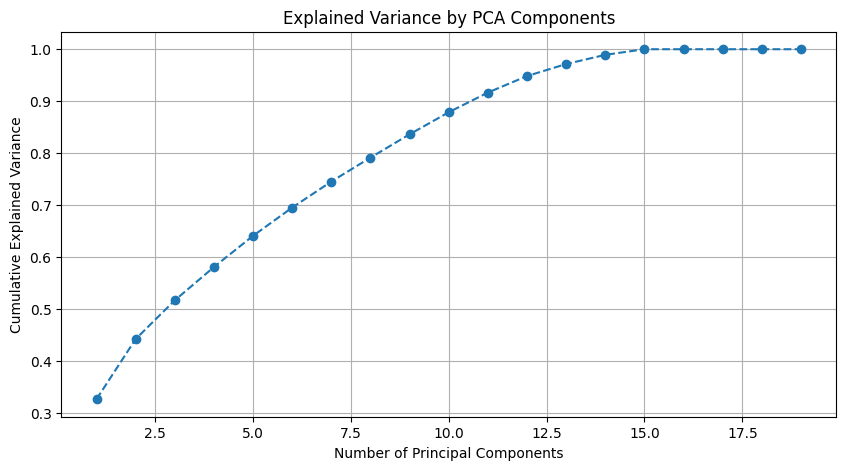

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(selected_columns) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [42]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1  # Get number of components for 95% variance

print(f"Number of components needed to explain 95% variance: {n_components}")

pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca_final, columns=[f'PC{i+1}' for i in range(n_components)])

Number of components needed to explain 95% variance: 13


In [43]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,1.823652,-2.941102,-0.968966,-0.584327,0.986108,-0.179790,0.398474,-1.628679,-0.567399,0.221997,-0.208314,-0.329435,0.368153
1,0.367736,-1.409699,-1.670282,1.295385,-0.885038,-1.348382,2.141578,-1.573808,0.875939,0.575058,-0.614133,-0.320171,-0.320742
2,2.554092,-4.657463,1.888453,1.599435,1.795461,0.033669,0.203990,-0.254068,-0.914265,0.180363,-1.912765,-0.920434,-1.214302
3,0.615676,1.263781,-2.939935,1.337242,0.324782,1.066355,-0.353780,-2.166430,1.655458,-1.146505,-1.455600,-1.356830,-0.539754
4,6.623513,0.935577,-0.835520,3.111189,0.664170,1.409538,1.173034,-1.349267,1.284934,-0.233185,1.414903,0.364529,-0.095561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525582,3.521582,-3.093360,2.906361,2.025112,1.224332,0.747963,0.777937,1.315022,1.042243,-0.708736,-3.113539,-0.595150,-0.184440
525583,3.872591,-3.247692,2.605968,1.451096,1.233073,0.571663,0.066358,1.492890,0.958335,-0.422988,-3.172839,-0.751336,-0.442836
525584,2.359059,-2.241527,-2.090643,-0.408973,0.741425,0.306163,0.248950,-3.003056,-0.280930,-0.264948,0.794708,-1.126944,-0.347654
525585,3.949948,-2.786295,2.877097,1.620917,2.328034,0.529651,-0.056581,0.516022,-0.629066,-0.690489,-3.067532,-0.343536,-0.404658


In [44]:
# Compute variance of each feature
feature_variance = df[selected_columns].var()

# Sort features by variance (descending order)
feature_variance_sorted = feature_variance.sort_values(ascending=False)

print(feature_variance_sorted)

duration_ms         9.248533e+09
tempo               8.892337e+02
decade              5.233641e+02
popularity          3.352937e+02
loudness            2.599736e+01
key                 1.238093e+01
emotion_index       2.096494e+00
mode                2.252908e-01
acousticness        1.209080e-01
chill_index         8.355716e-02
instrumentalness    7.084767e-02
valence             6.646686e-02
energy              6.337540e-02
explicit            4.300033e-02
speechiness         3.490188e-02
mood_index          3.447737e-02
liveness            3.409099e-02
party_index         2.776405e-02
danceability        2.767026e-02
dtype: float64
